In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from path import Path as path

In [2]:
mypath = "part2/"

In [7]:
data = ImageDataBunch.from_folder(mypath, valid_pct = 0.2, size=224,ds_tfms=get_transforms()).normalize(imagenet_stats)

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.849478,0.525051,0.150000
2,0.855959,0.291675,0.100000
3,0.673085,0.221493,0.050000
4,0.563779,0.186816,0.050000


In [10]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

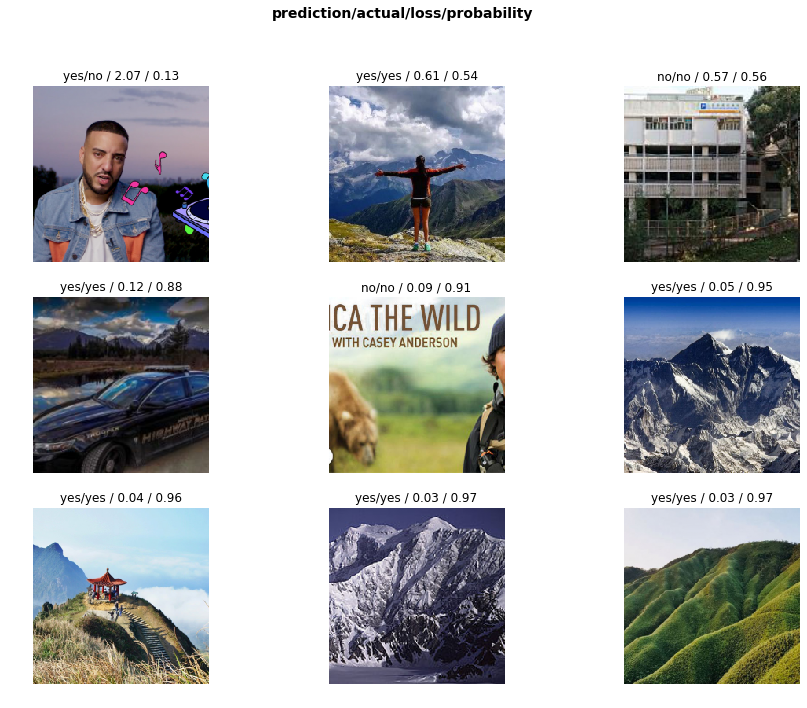

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

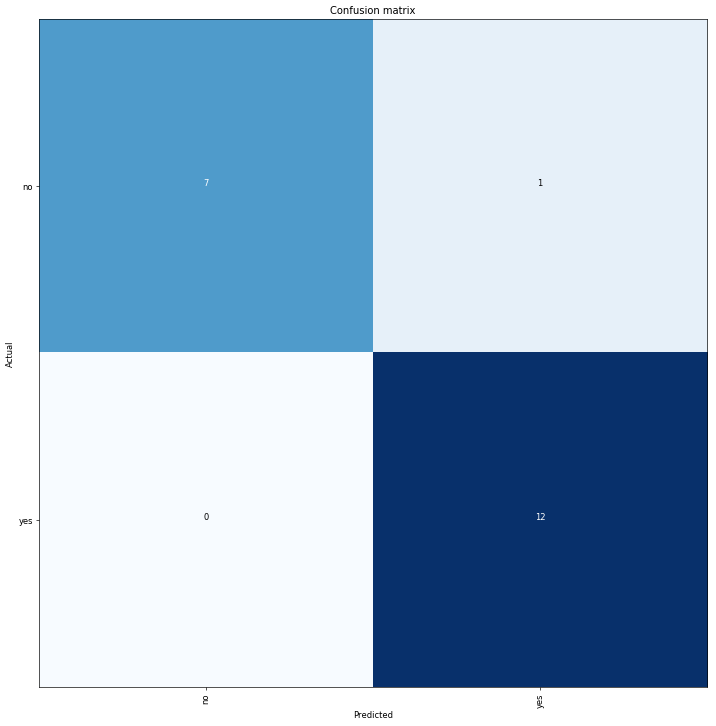

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
learn.save("stage1")